In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join

RESULTS_DIRECTORY = './results-pr'

def get_experiment_filenames():
    return [f for f in listdir(RESULTS_DIRECTORY) if isfile(join(RESULTS_DIRECTORY, f))]

def get_experiment_names():
    filenames = get_experiment_filenames()
    experiment_names = list(map(lambda x: x.split('-')[1], filenames))
    return list(set(experiment_names))

def get_filenames_for_experiment(experiment_name):
    filenames = get_experiment_filenames()
    return list(filter(lambda x: experiment_name in x, filenames))

def read_experiment_data(filenames):
    data = []
    for filename in filenames:
        with open(RESULTS_DIRECTORY + '/' + filename) as file:
            data.append(list(map(float, filter(lambda x: x!='', file.read().split('\n')))))
    return data

def get_mean(data):
    indices = range(len(data[0]))
    result = []
    for i in indices:
        result.append((data[0][i] + data[1][i] + data[2][i])/3)
    return result

def plot_experiment(experiments, name):
    fig, axes = plt.subplots(
        nrows=15, ncols=3, sharex=True, sharey=True, figsize=(30, 150)
    )
    
    for experiment, i in zip(experiments, range(15)):
        experiment_filenames = get_filenames_for_experiment(experiment)
        as_filenames, ias_filenames = experiment_filenames[:3], experiment_filenames[3:]
        as_data, ias_data = read_experiment_data(as_filenames), read_experiment_data(ias_filenames)

        pd.DataFrame(as_data).plot.box(ax=axes[i][0])
        pd.DataFrame(ias_data).plot.box(ax=axes[i][1])

        axes[i][0].set_title('AntSystem_' + experiment)
        axes[i][1].set_title('IndependentAntSystem_' + experiment)
        axes[i][2].set_title('Comparasion_' + experiment)

        iterations=range(0, 100)
        as_data_mean = get_mean(as_data)
        ias_data_mean = get_mean(ias_data)

        axes[i][2].plot(iterations, as_data_mean, 'b-', iterations, ias_data_mean, 'r-')
        
        ticks = list(range(0, 100, 10))
        
        for j in range(3):
            axes[i][j].set_xticks(ticks)
            axes[i][j].set_xticklabels(ticks)
        
    plt.savefig(name + '.png')

    

In [92]:
import re

_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)]   


experiments = get_experiment_names()
experiments.sort(key=natural_sort_key)


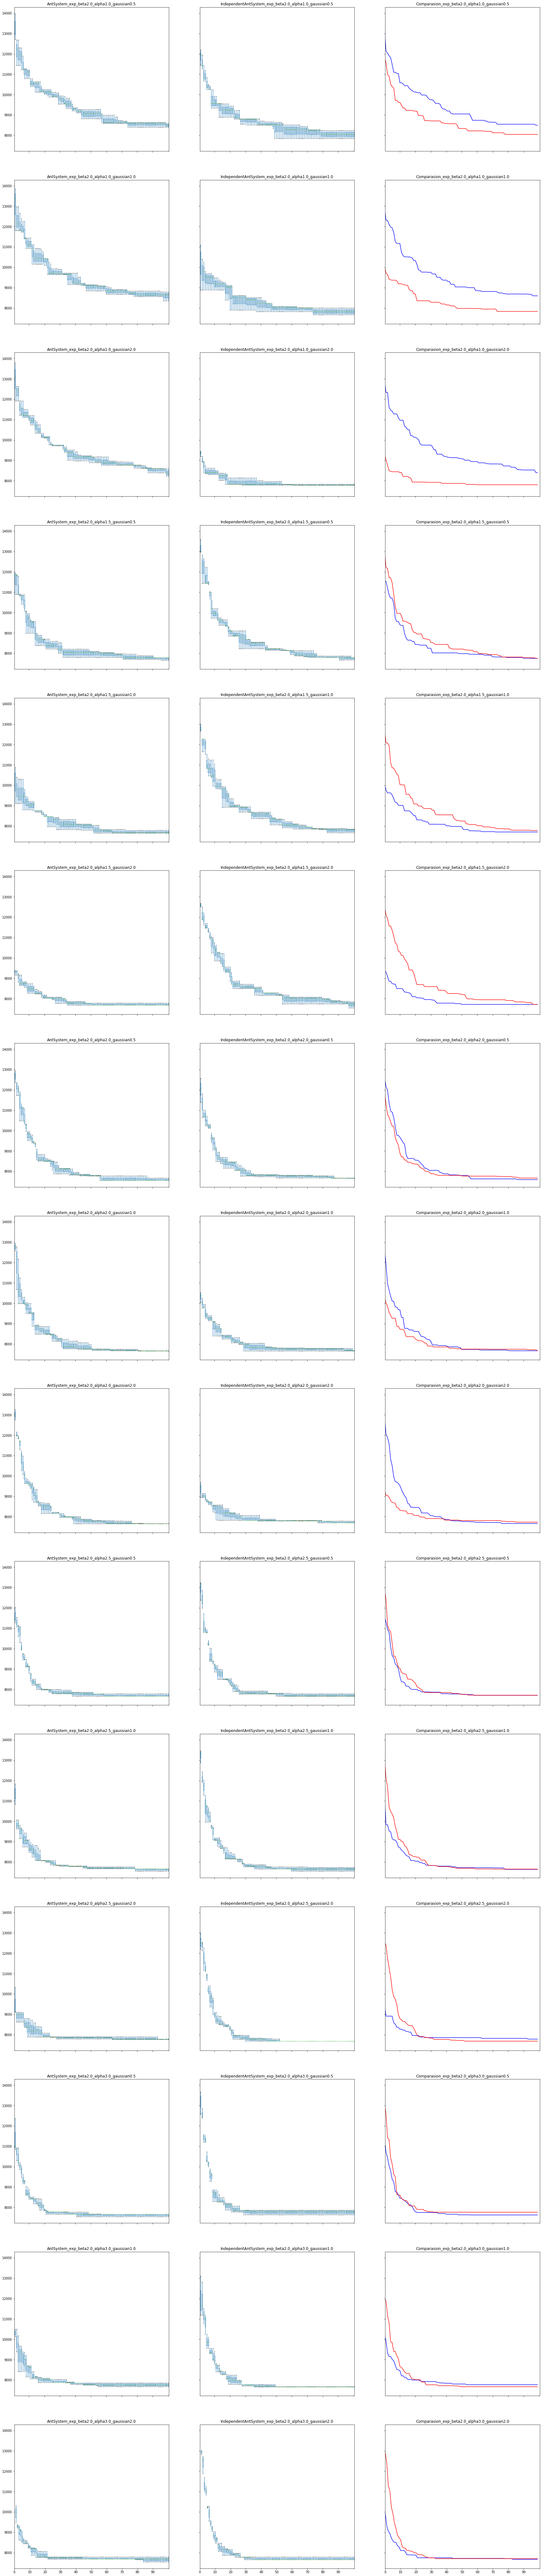

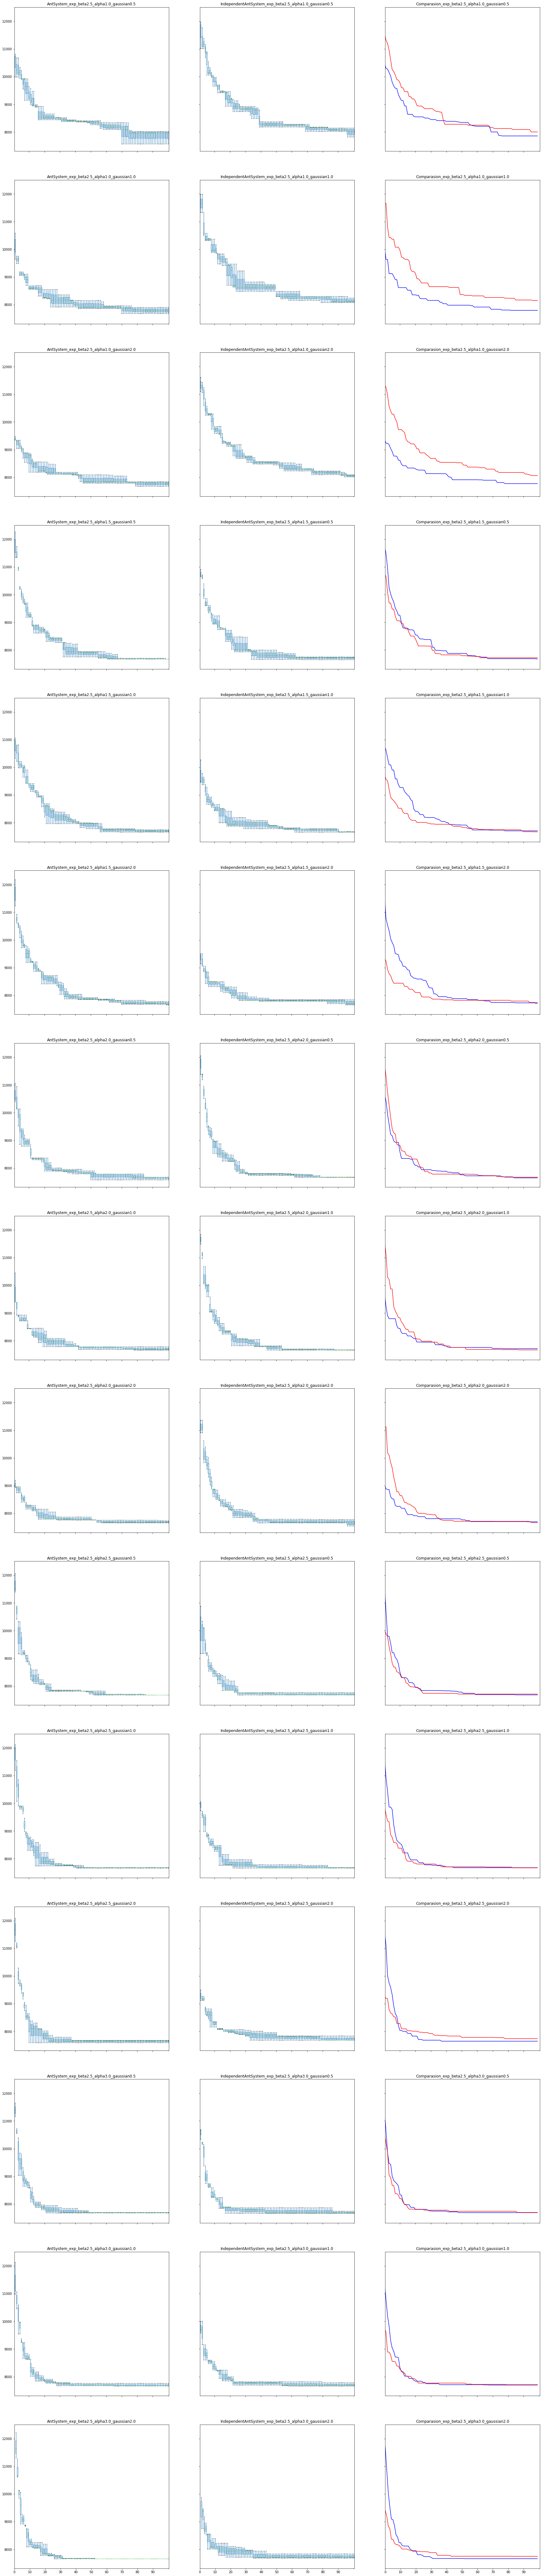

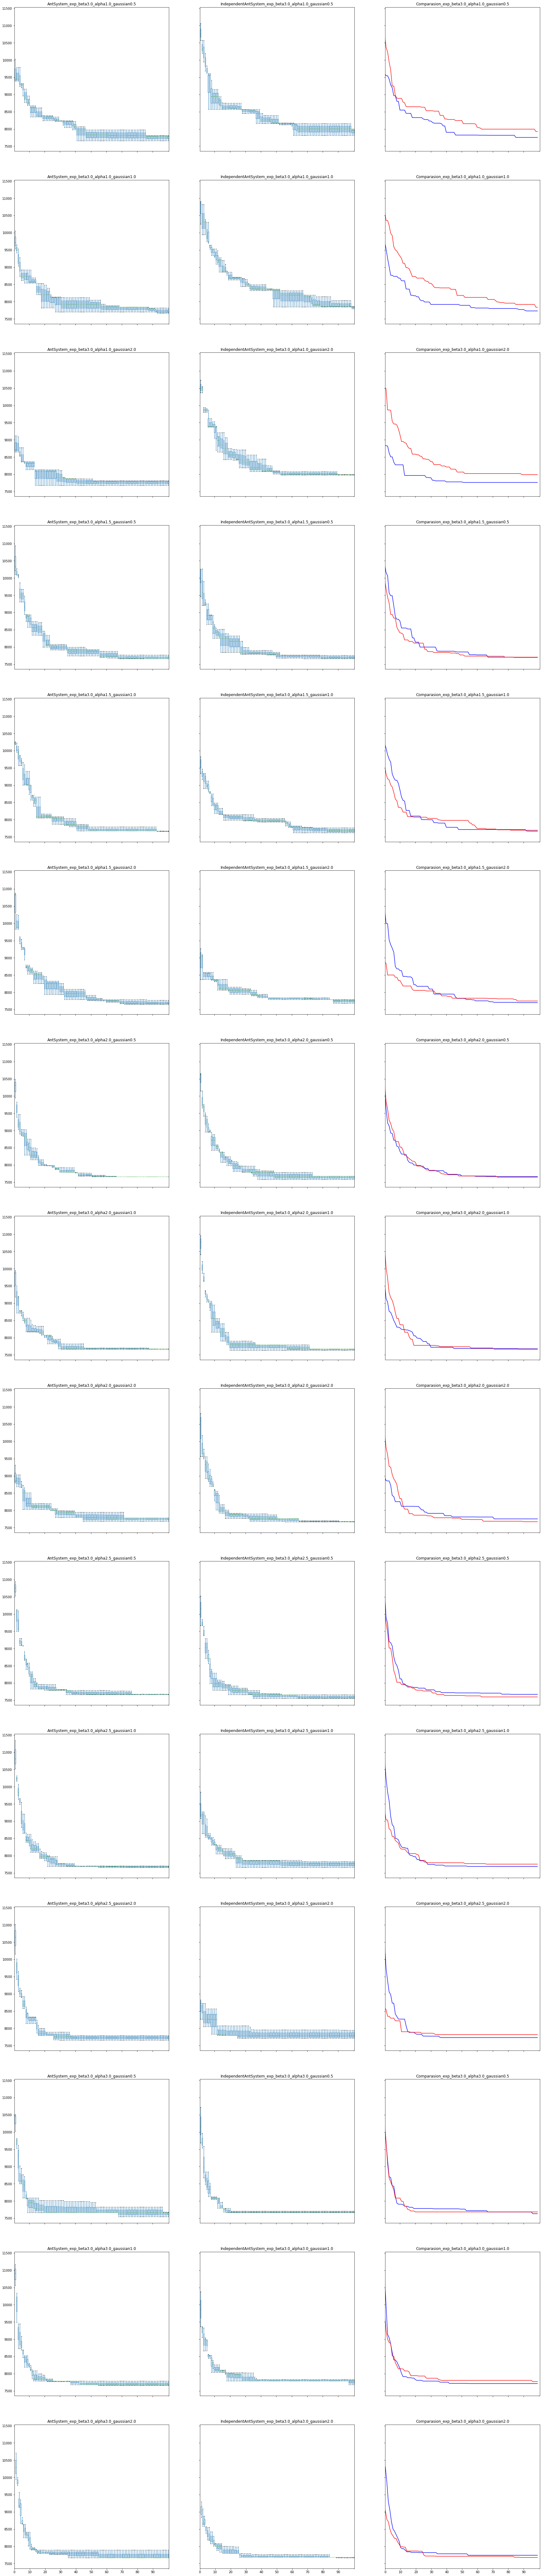

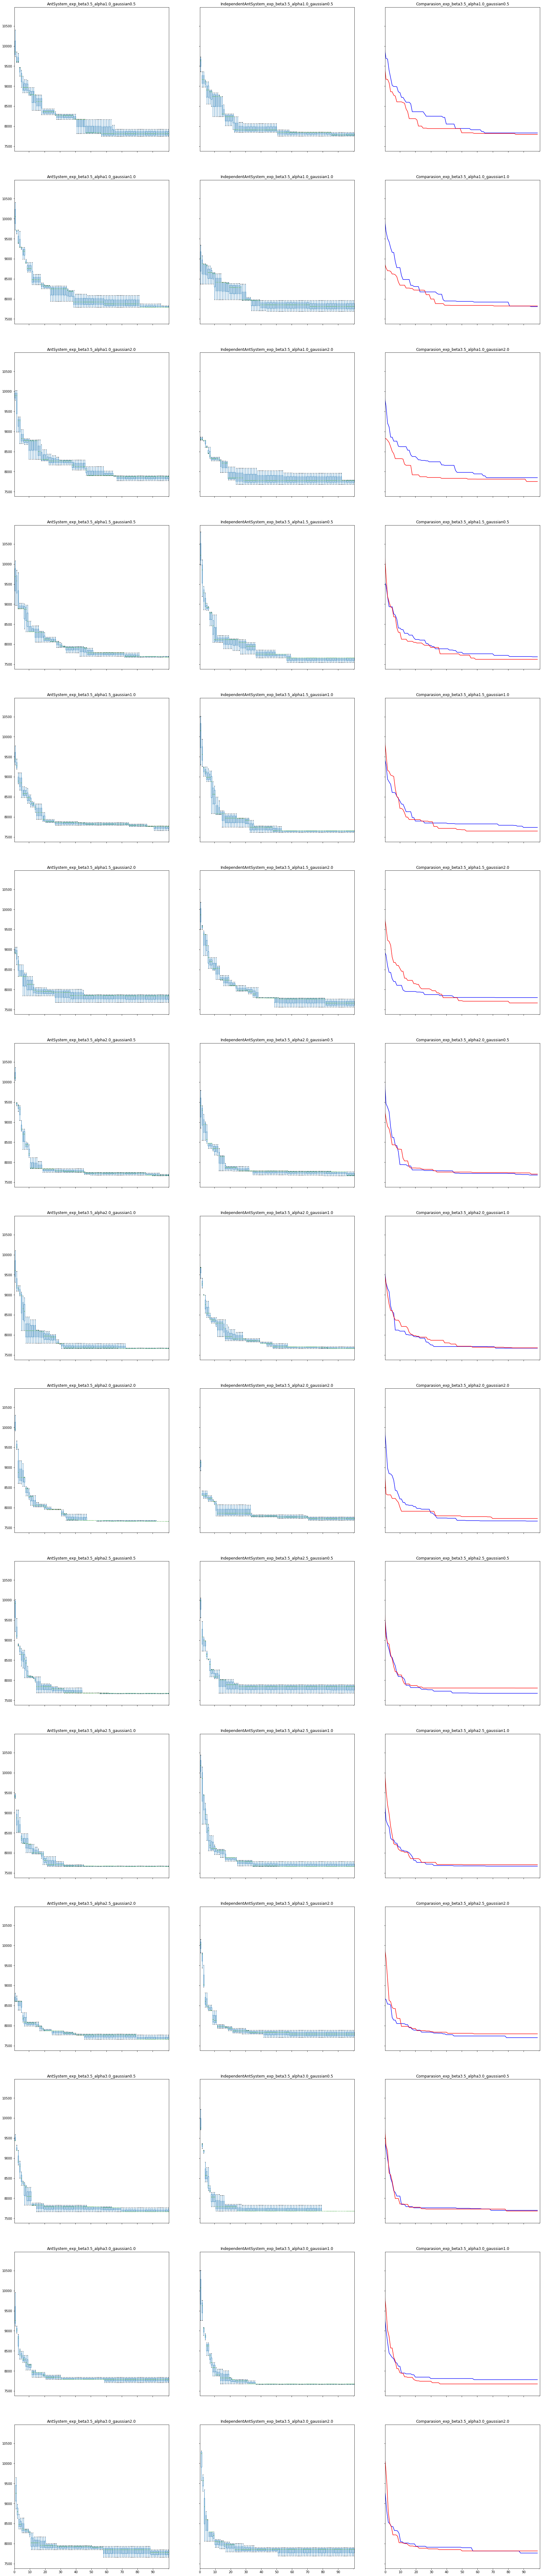

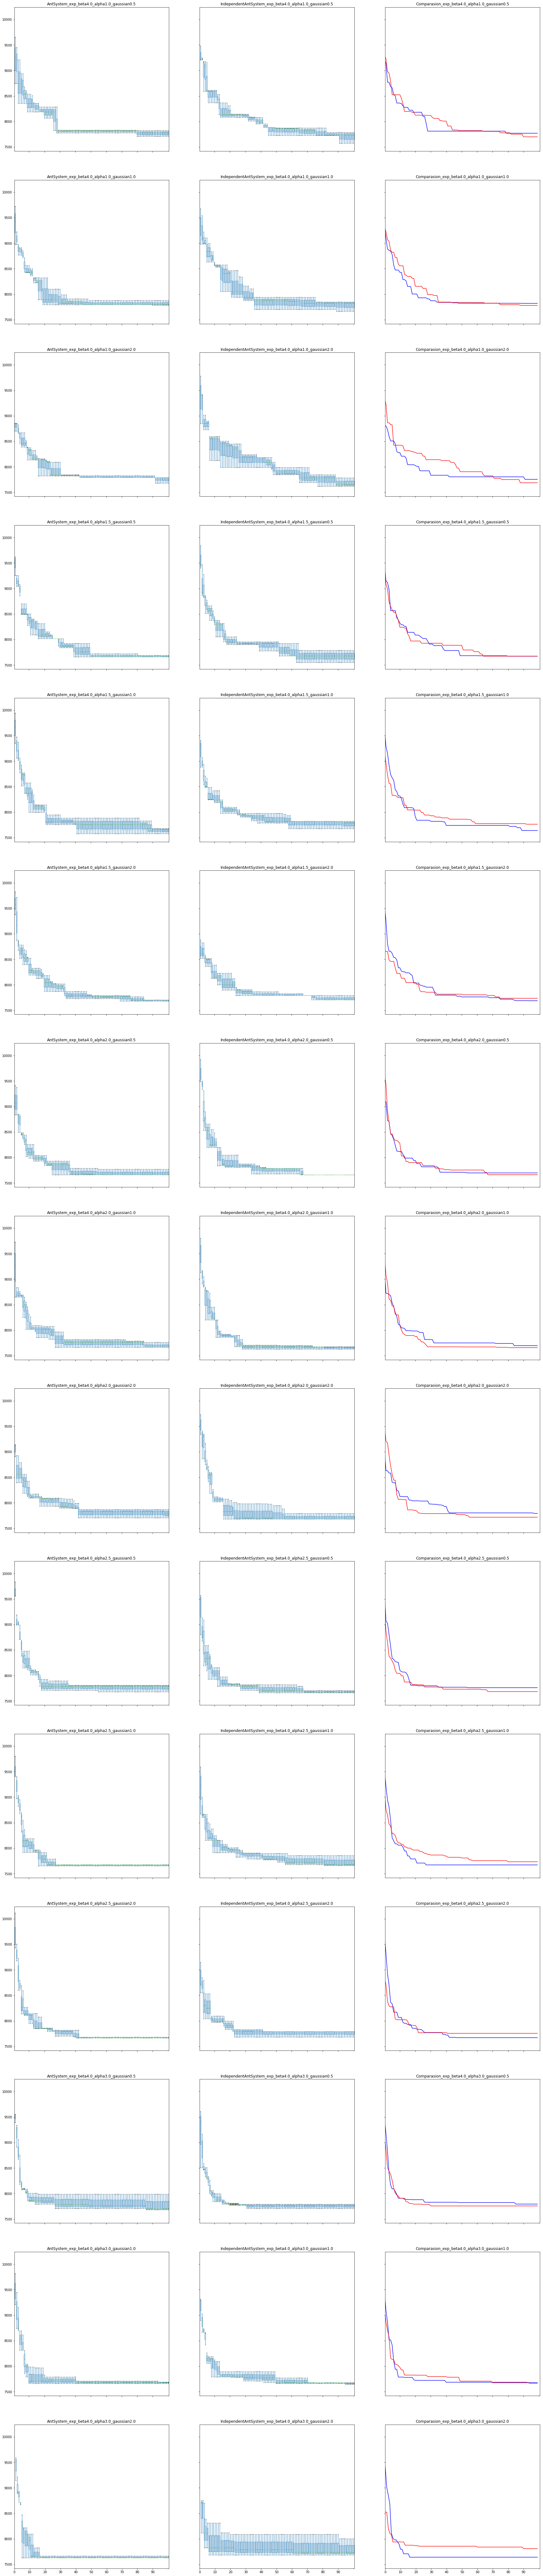

In [95]:
plot_experiment(experiments[:15], 'beta_2.0_')
plot_experiment(experiments[15:30], 'beta_2.5_')
plot_experiment(experiments[30:45], 'beta_3.0_')
plot_experiment(experiments[45:60], 'beta_3.5_')
plot_experiment(experiments[60:75], 'beta_4.0_')